NAME : Anjali Saner


PROJECT NAME : Prediction using Decision Tree Algorithm


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [29]:
dataset = pd.read_csv("Iris.csv")

In [30]:
d3 = dataset

In [31]:
d3

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [32]:
d3.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
d3.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


Data Pre-Processing

In [34]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [35]:
d3.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [36]:
d3["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [37]:
print(d3["Species"].value_counts())

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64


Text(0, 0.5, 'Total Count')

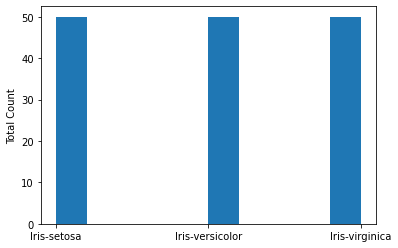

In [38]:
plt.hist(d3["Species"])
plt.ylabel("Total Count")

In [39]:
from sklearn.model_selection import train_test_split

Splitting the Dataset

In [40]:
x = d3.drop(["Species","Id"],axis=1)
y = d3['Species']


In [41]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state=0)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

Training the Model

In [44]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree_test = round(decision_tree.score(X_test, Y_test) * 100, 2)

Classification Report

In [46]:
y_pred = decision_tree.predict(X_train) 
from sklearn.metrics import classification_report
print(classification_report(Y_train, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        34
Iris-versicolor       1.00      1.00      1.00        32
 Iris-virginica       1.00      1.00      1.00        39

       accuracy                           1.00       105
      macro avg       1.00      1.00      1.00       105
   weighted avg       1.00      1.00      1.00       105



In [47]:
Y_pred = decision_tree.predict(X_test)
print(classification_report(Y_test, Y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.89      0.94        18
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.96        45
      macro avg       0.95      0.96      0.95        45
   weighted avg       0.96      0.96      0.96        45



In [60]:
print("Train Accuracy:",acc_decision_tree )
print("Test Accuracy:",acc_decision_tree_test)

Train Accuracy: 100.0
Test Accuracy: 95.56


Visualizing the Decision Tree

[Text(178.56, 391.392, 'X[2] <= -0.823\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(133.92000000000002, 304.416, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(223.2, 304.416, 'X[2] <= 0.624\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(89.28, 217.44, 'X[3] <= 0.544\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(44.64, 130.464, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(133.92000000000002, 130.464, 'X[1] <= 0.126\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(89.28, 43.488, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(178.56, 43.488, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(357.12, 217.44, 'X[2] <= 0.68\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(312.48, 130.464, 'X[1] <= -0.671\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(267.84000000000003, 43.488, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(357.12, 43.488, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(401.76, 1

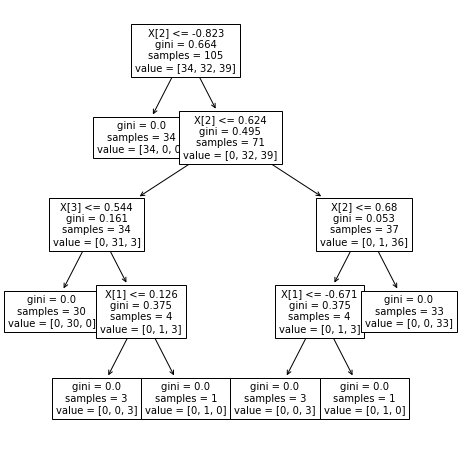

In [55]:
from sklearn import tree
fig,ax = plt.subplots(figsize = (8, 8))
tree.plot_tree(decision_tree,fontsize=10) 